# Run the whole deltas algorithm

In [113]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
# import deltas
import model_deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [114]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-20, -20],
    m2=[20, 20],
    cov1=[[10, 0], [0, 10]],
    cov2=[[50, 0], [0, 20]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

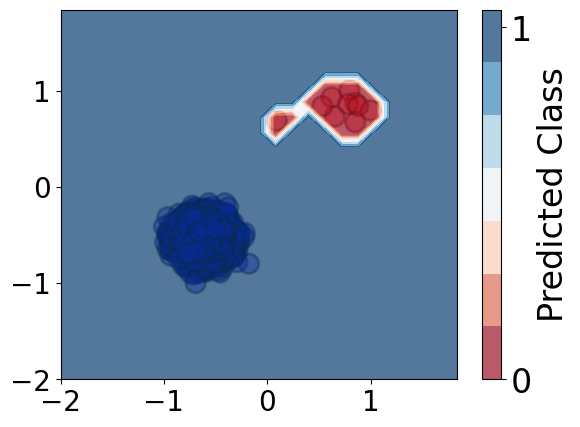

In [115]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'] = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [116]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[0.47967482]])

## Fit deltas

In [117]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.base_deltas(clf).fit(X, y, _print=True, _plot=True)

deltas init: [1, 0.46090198321102677]
eq. 7 can be satisfied: True
constraint init: False


## Plot training data information

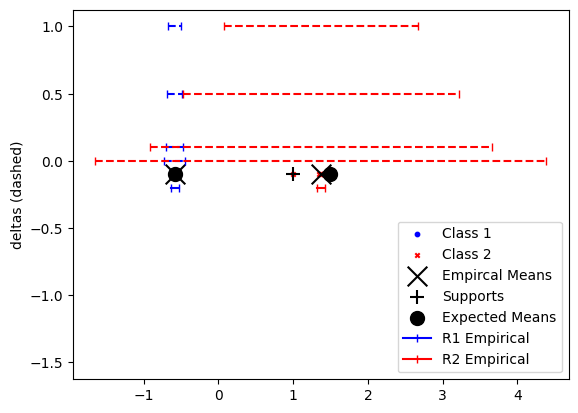

In [118]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## Show parameters

In [119]:
deltas_model.print_params()

Parameters
                R:  1.463465463410429
                N1: 10000
                N2: 10
                R1: 0.0553345381203072
                R2: 0.3708110162867302
                M:  1.5833315263101635
                D:  1.9569987130520385
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.8839
deltas   accuracy: 1.0
original F1: 0.8686502998076706
deltas   F1: 1.0
original precision: 1.0
deltas   precision: 1.0


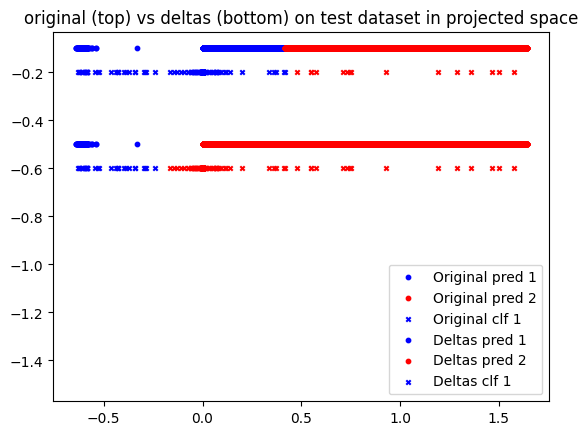

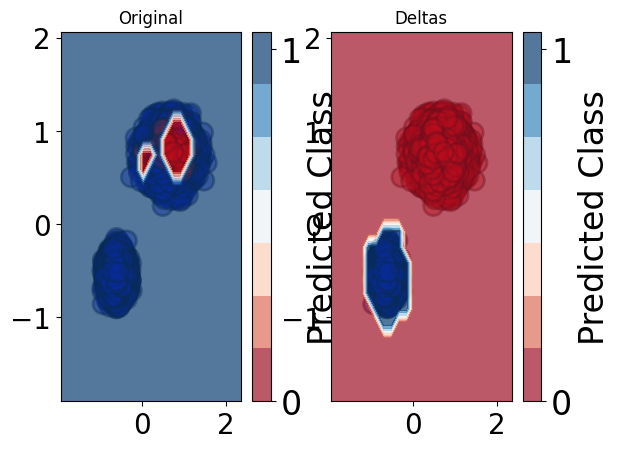

In [120]:
pipeline.eval_test_new(clf, deltas_model,
                       data_clf['data_test'], _print=True, _plot=True)